In [3]:
import pandas as pd

df = pd.read_csv(r"C:\Users\Goutham\DA PROJECTS\cleaned_dataset.csv")

df["Date"] = pd.to_datetime(df["Date"])
df["Delay_Minutes"] = df["Delay_Minutes"].fillna(0)

df.to_csv("../data/cleaned_data.csv", index=False)
print("Data cleaning completed.")


Data cleaning completed.


Heatmap saved.


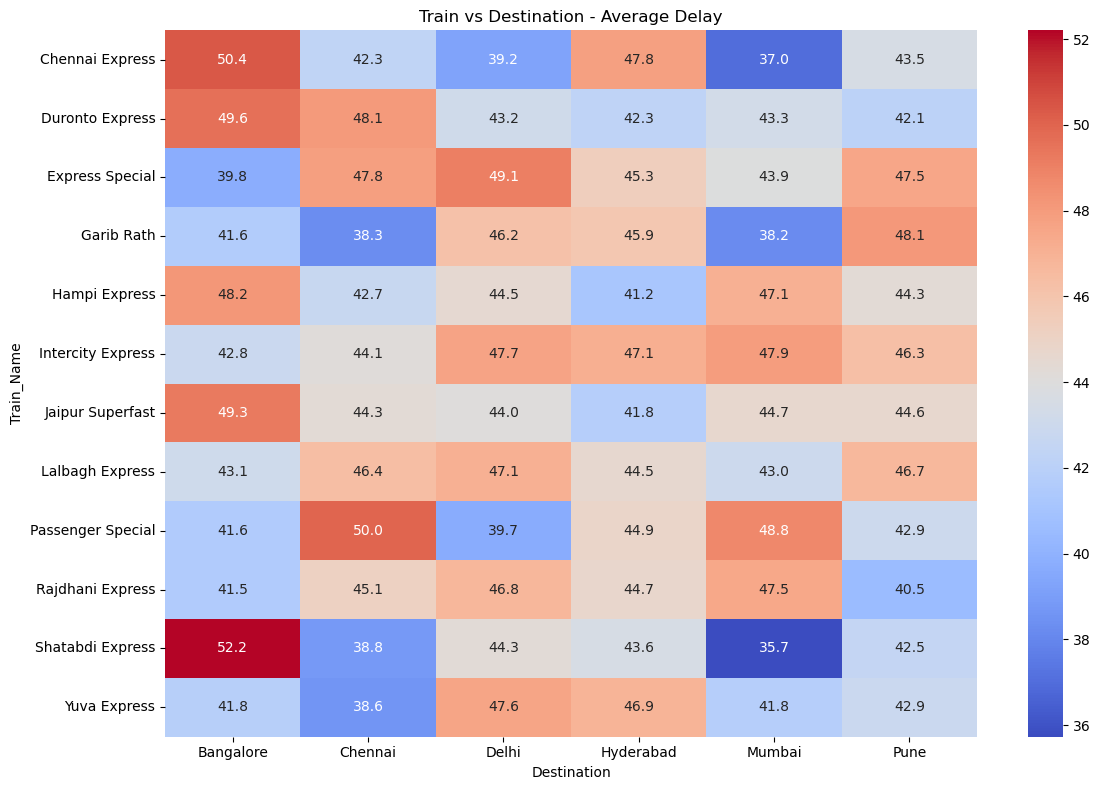

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv(r"C:\Users\Goutham\DA PROJECTS\cleaned_dataset.csv")




Heatmap saved.


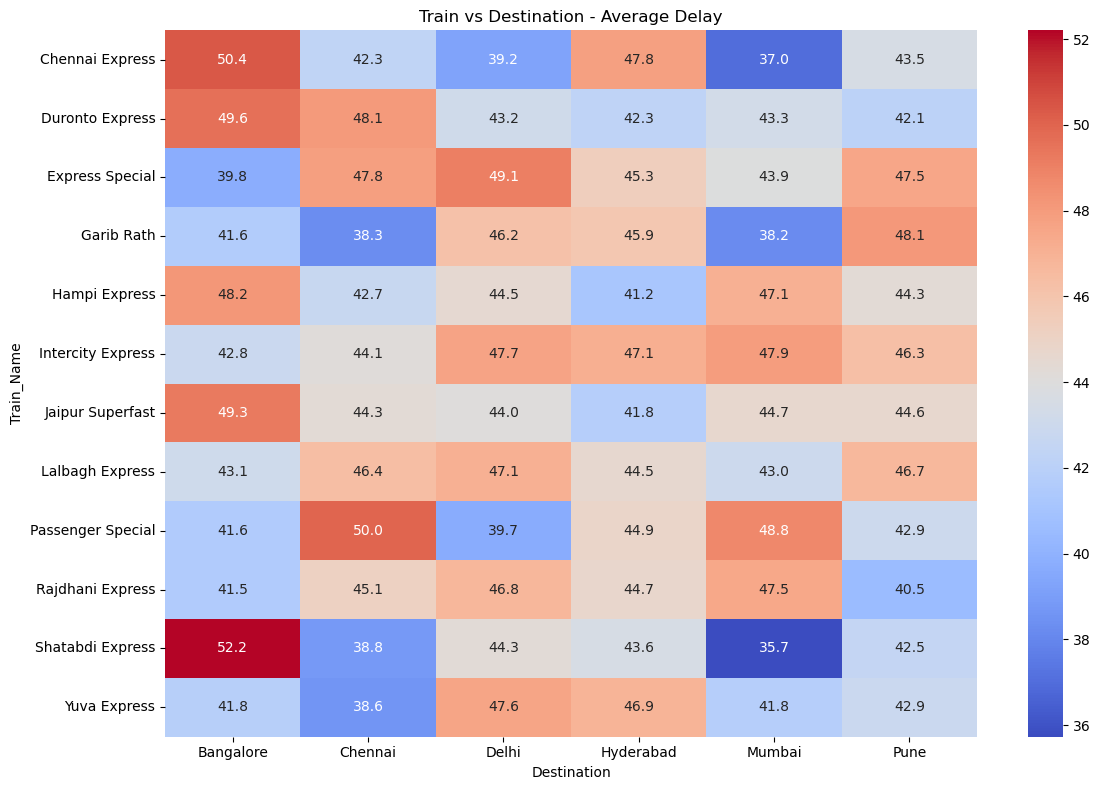

In [23]:
pivot_df = df.pivot_table(
    index="Train_Name",
    columns="Destination",
    values="Delay_Minutes",
    aggfunc="mean"
)

plt.figure(figsize=(12, 8))
sns.heatmap(pivot_df, annot=True, cmap="coolwarm", fmt=".1f")
plt.title("Train vs Destination - Average Delay")
plt.tight_layout()
plt.savefig(r"C:\Users\Goutham\DA PROJECTS\railway-performance-analytics\outputs")
print("Heatmap saved.")

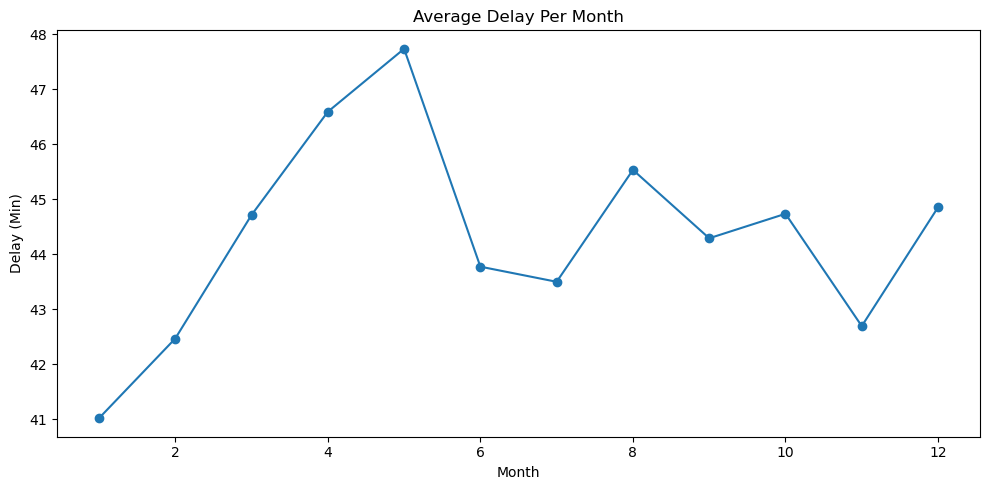

In [19]:
monthly = df.groupby("Month")["Delay_Minutes"].mean()

plt.figure(figsize=(10,5))
monthly.plot(kind="line", marker="o")
plt.title("Average Delay Per Month")
plt.xlabel("Month")
plt.ylabel("Delay (Min)")
plt.tight_layout()
plt.savefig(r"C:\Users\Goutham\DA PROJECTS\railway-performance-analytics\outputs")

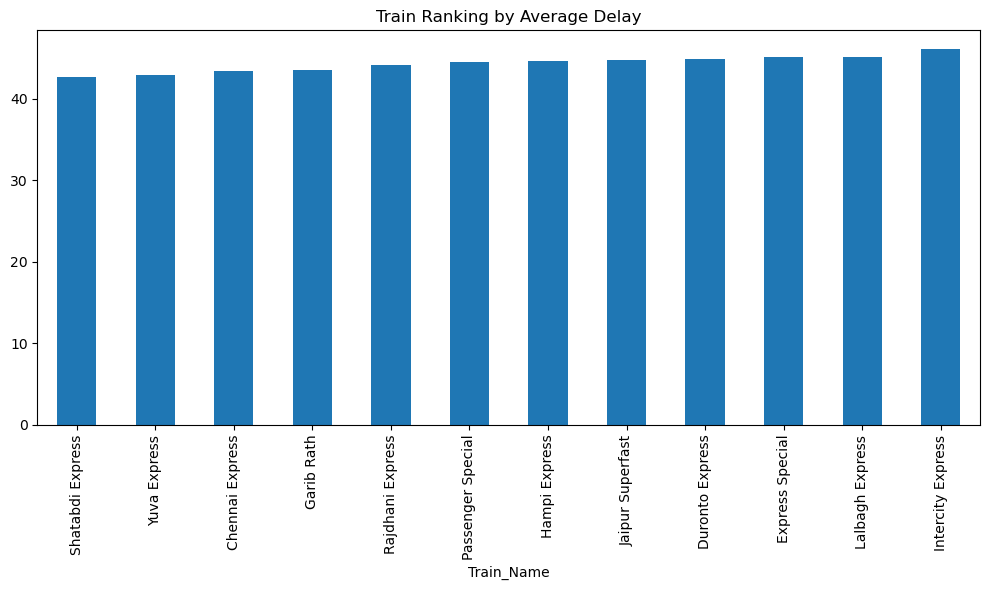

In [15]:
ranking = df.groupby("Train_Name")["Delay_Minutes"].mean().sort_values()

plt.figure(figsize=(10,6))
ranking.plot(kind="bar")
plt.title("Train Ranking by Average Delay")
plt.tight_layout()
plt.savefig(r"C:\Users\Goutham\DA PROJECTS\railway-performance-analytics\outputs")

In [17]:
print("Top 5 Most Delayed Trains:")
print(df.groupby("Train_Name")["Delay_Minutes"].mean().sort_values().tail())

print("Top 5 Most Profitable Trains:")
print(df.groupby("Train_Name")["Revenue"].sum().sort_values().tail())

Top 5 Most Delayed Trains:
Train_Name
Jaipur Superfast     44.795082
Duronto Express      44.855191
Express Special      45.095628
Lalbagh Express      45.166667
Intercity Express    46.103825
Name: Delay_Minutes, dtype: float64
Top 5 Most Profitable Trains:
Train_Name
Passenger Special    29761008
Express Special      29801924
Intercity Express    30370182
Garib Rath           30569509
Shatabdi Express     30588162
Name: Revenue, dtype: int64
